In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
url = f'https://raw.githubusercontent.com/Malinda1/Rock-Vs-Mine-prediction/refs/heads/main/sonar%20data.csv'

data01 = pd.read_csv(url, header = None)

data01.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: >

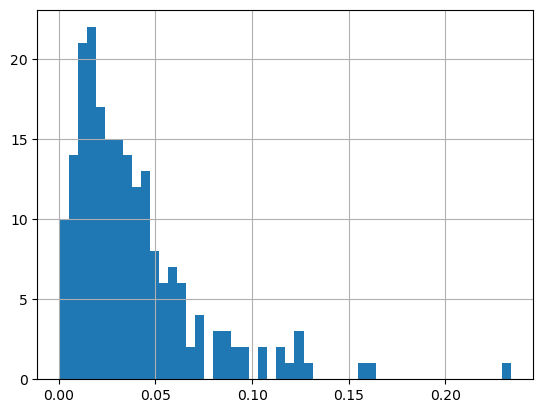

In [5]:
data01[1].hist(bins = 50)

In [7]:
data01_copy = data01.copy()

In [9]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [11]:
data01.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


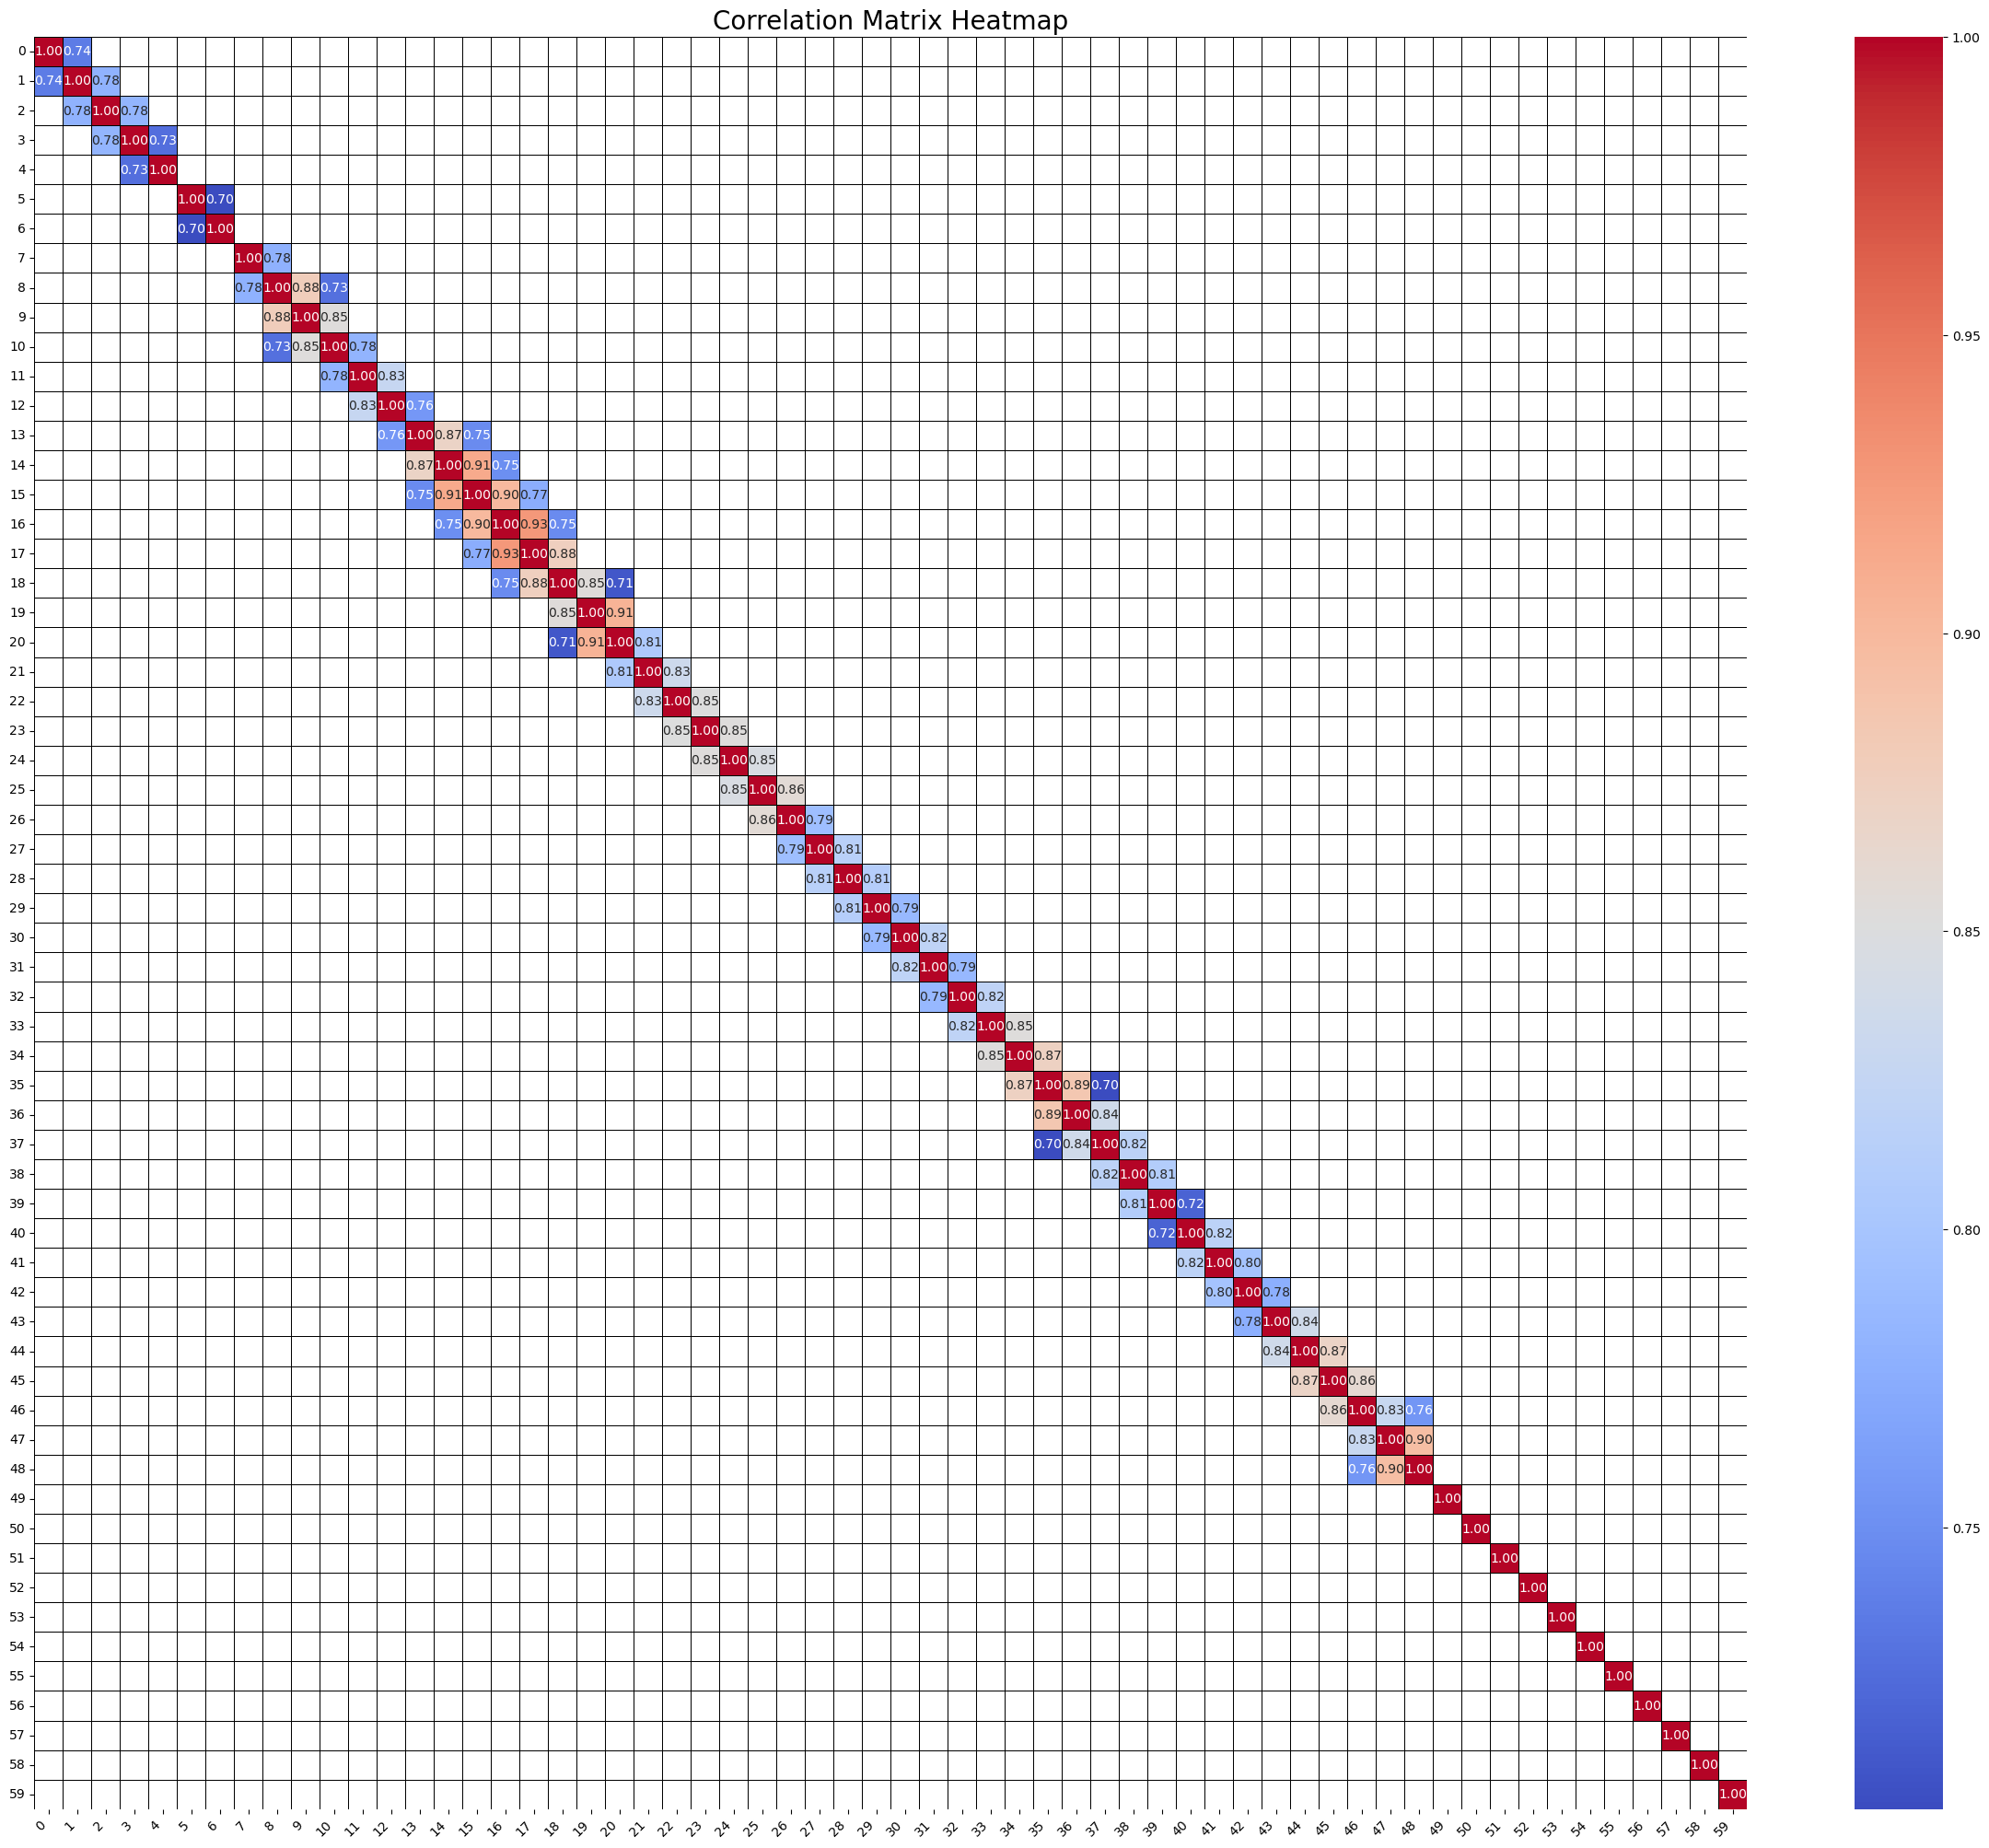

In [13]:
# Compute the correlation matrix
correlation_matrix = data01.select_dtypes(include = ['number']).corr()

# Mask weak correlations
mask = correlation_matrix.abs() < 0.7


# Plot the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, 
            annot=True,          # Show correlation values
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Use the 'coolwarm' colormap
            cbar=True,           # Display the color bar
            mask=mask,
           linewidths = 0.5,
           linecolor = 'black')
plt.title("Correlation Matrix Heatmap", fontsize=20)
# Rotate the x and y-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

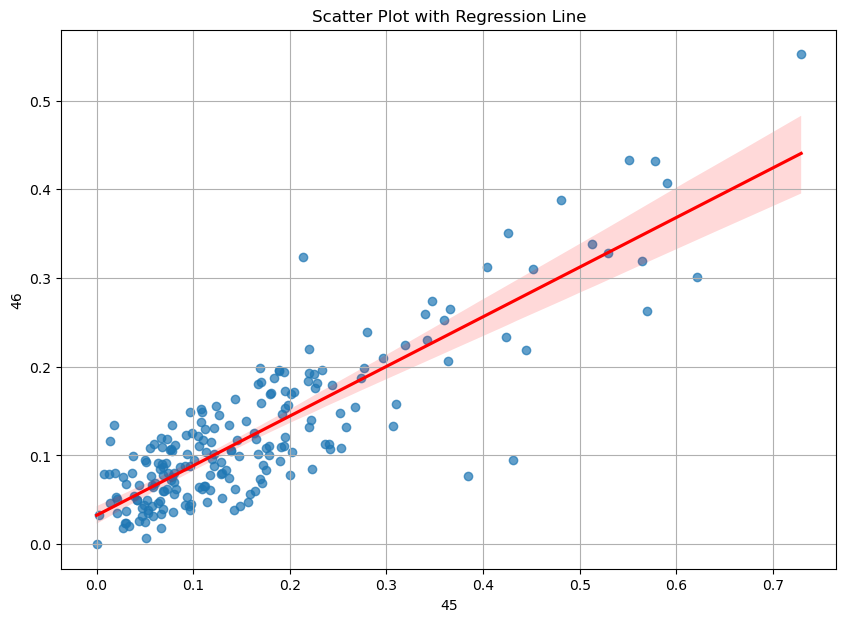

In [15]:
# Create the scatter plot with regression line
plt.figure(figsize=(10, 7))
sns.regplot(x=data01[45], y=data01[46], data=data01, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("45")
plt.ylabel("46")
plt.grid(True)
plt.show()

In [17]:
data01.isnull().sum().sum()

0

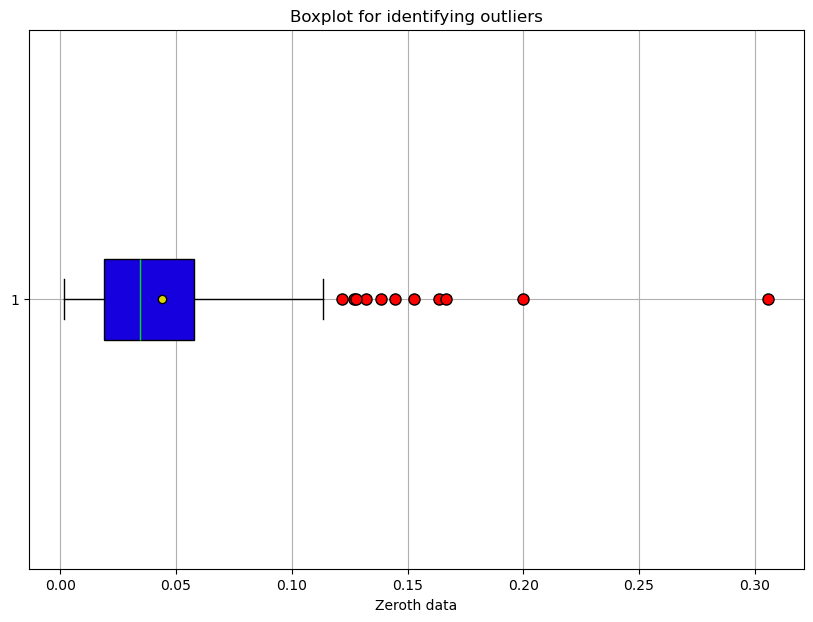

In [19]:
plt.figure(figsize = (10, 7))

plt.boxplot(data01[2],
           vert = False,
            patch_artist = True,
            showmeans = True,
            boxprops = dict(facecolor = '#1700DE'),
            meanprops=dict(marker='o', markerfacecolor='#DED500', markeredgecolor='black'),  # Style for the mean
            whiskerprops=dict(color='black'),  # Color for whiskers
            capprops=dict(color='black'),  # Color for caps
            medianprops=dict(color='#00DE1B'),  # Color for the median line
            flierprops=dict(marker='o', color='red', markersize = 8, markerfacecolor = 'red')  # Custom outlier color
           )
plt.title('Boxplot for identifying outliers')
plt.xlabel('Zeroth data')
plt.grid(True)
plt.show()

## Outliers removel process

In [21]:
q1 = data01[0].quantile(0.25)
q3 = data01[0].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [23]:
lower_bound

-0.019949999999999996

In [25]:
upper_bound

0.06885

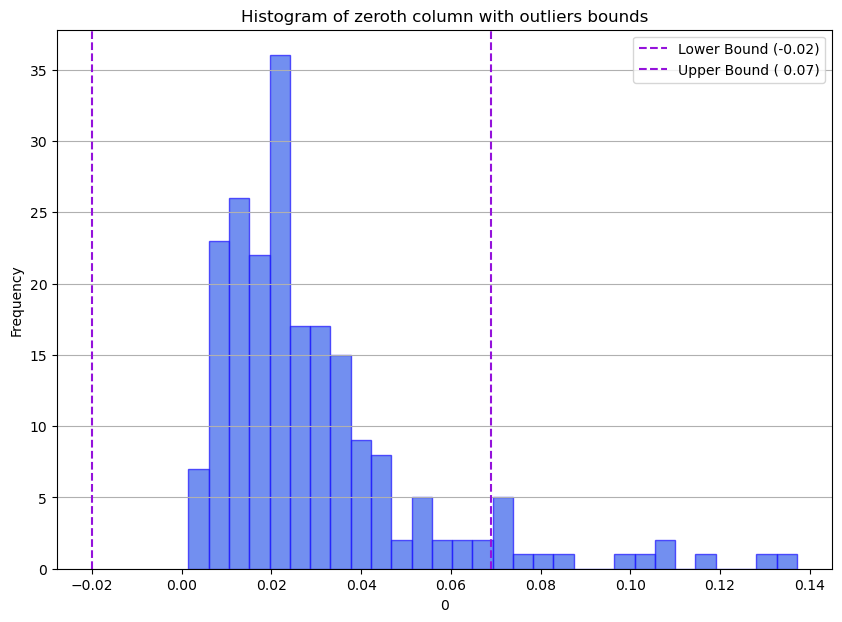

In [27]:
plt.figure(figsize = (10, 7))

plt.hist(data01[0], bins = 30, color = '#3660EB', edgecolor = '#1C13FF', alpha = 0.7)
plt.axvline(lower_bound, color = '#9412DB', linestyle = '--', label = f'Lower Bound ({lower_bound: .2f})')
plt.axvline(upper_bound, color = '#9412DB', linestyle = '--', label = f'Upper Bound ({upper_bound: .2f})')
plt.title('Histogram of zeroth column with outliers bounds')
plt.xlabel('0')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [29]:
# IQR (Interquartile range) method

Q1 = data01.iloc[:, :-1].quantile(0.25)
Q3 = data01.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Filter out Rows with outliers
data01_outliers_free = data01[~((data01.iloc[:, :-1] <= (Q1 - 1.5 * IQR)) | (data01.iloc[:, :-1] >= (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
data01_outliers_free.shape

(134, 61)

In [33]:
data01.shape

(208, 61)

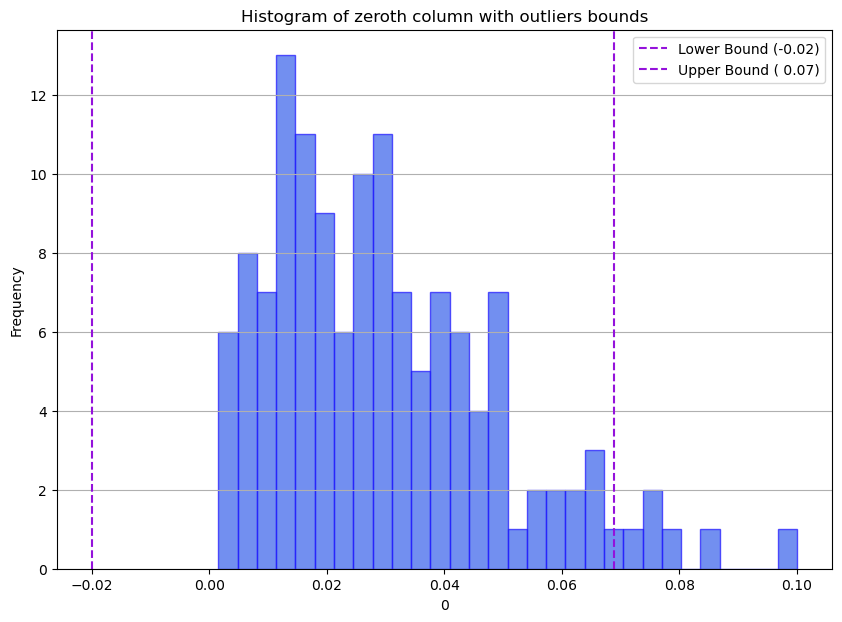

In [35]:
plt.figure(figsize = (10, 7))

plt.hist(data01_outliers_free[2], bins = 30, color = '#3660EB', edgecolor = '#1C13FF', alpha = 0.7)
plt.axvline(lower_bound, color = '#9412DB', linestyle = '--', label = f'Lower Bound ({lower_bound: .2f})')
plt.axvline(upper_bound, color = '#9412DB', linestyle = '--', label = f'Upper Bound ({upper_bound: .2f})')
plt.title('Histogram of zeroth column with outliers bounds')
plt.xlabel('0')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_oulier_scaled = scaler.fit_transform(data01.iloc[:, :-1])

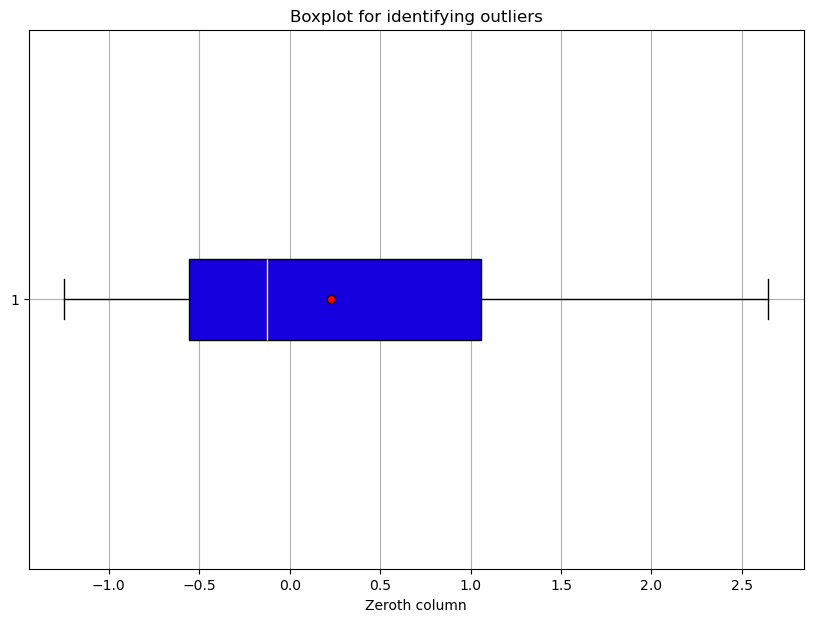

In [39]:
plt.figure(figsize = (10, 7))

plt.boxplot(df_oulier_scaled[1],
           vert = False,
            patch_artist = True,
            showmeans = True,
            boxprops = dict(facecolor = '#1700DE'),
            meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'),  # Style for the mean
            whiskerprops=dict(color='black'),  # Color for whiskers
            capprops=dict(color='black'),  # Color for caps
            medianprops=dict(color='yellow'),  # Color for the median line
           )
plt.title('Boxplot for identifying outliers')
plt.xlabel('Zeroth column')
plt.grid(True)
plt.show()

In [41]:
df_oulier_scaled.shape

(208, 60)

In [43]:
data02 = pd.DataFrame(df_oulier_scaled)

In [45]:
data02.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.126126,0.200000,0.217949,-0.581931,0.528726,0.096125,0.642271,0.538267,1.163123,0.182309,...,0.750000,-0.920635,-0.310433,0.723288,-0.037736,1.595142,1.791822,0.385185,0.390977,-0.387097
1,1.013514,0.682540,1.282051,0.619315,0.896746,2.476155,1.486320,2.646482,1.330279,0.665714,...,-0.112903,-0.317460,-0.066158,-0.493151,0.238994,1.983806,1.197026,-0.133333,-0.180451,-0.165899
2,0.153153,0.869841,1.938462,1.601246,0.560868,2.024590,1.862517,2.971685,2.987903,2.775925,...,-0.854839,1.248677,0.717557,0.021918,1.320755,2.842105,3.814126,1.570370,0.466165,0.460829
3,-0.576577,-0.434921,0.717949,-0.586916,-0.674970,-0.824888,0.038988,0.173816,-0.677786,-0.355725,...,0.822581,0.074074,-0.605598,0.624658,0.125786,0.072874,-0.141264,-0.207407,-0.360902,1.179724
4,2.405405,1.136508,0.353846,-0.115888,-0.056247,-0.406110,0.190834,1.509392,1.496701,1.673813,...,0.137097,-0.878307,-0.422392,0.131507,0.440252,-0.866397,0.185874,-0.148148,0.646617,0.755760


In [47]:
data01_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [49]:
data01_outliers_cleaned = pd.concat([data02, data01_copy[60]], axis = 1, ignore_index = True)
data01_outliers_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.126126,0.200000,0.217949,-0.581931,0.528726,0.096125,0.642271,0.538267,1.163123,0.182309,...,-0.920635,-0.310433,0.723288,-0.037736,1.595142,1.791822,0.385185,0.390977,-0.387097,R
1,1.013514,0.682540,1.282051,0.619315,0.896746,2.476155,1.486320,2.646482,1.330279,0.665714,...,-0.317460,-0.066158,-0.493151,0.238994,1.983806,1.197026,-0.133333,-0.180451,-0.165899,R
2,0.153153,0.869841,1.938462,1.601246,0.560868,2.024590,1.862517,2.971685,2.987903,2.775925,...,1.248677,0.717557,0.021918,1.320755,2.842105,3.814126,1.570370,0.466165,0.460829,R
3,-0.576577,-0.434921,0.717949,-0.586916,-0.674970,-0.824888,0.038988,0.173816,-0.677786,-0.355725,...,0.074074,-0.605598,0.624658,0.125786,0.072874,-0.141264,-0.207407,-0.360902,1.179724,R
4,2.405405,1.136508,0.353846,-0.115888,-0.056247,-0.406110,0.190834,1.509392,1.496701,1.673813,...,-0.878307,-0.422392,0.131507,0.440252,-0.866397,0.185874,-0.148148,0.646617,0.755760,R


## Handle imbalance

In [51]:
data01_outliers_cleaned[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

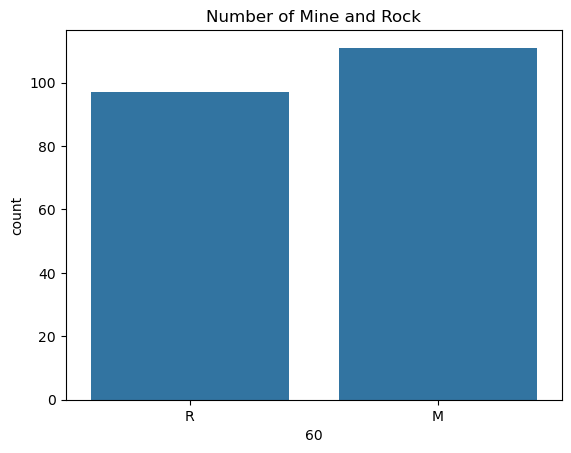

In [53]:
#plot the count of data
sns.countplot(x = data01_outliers_cleaned[60])
plt.title('Number of Mine and Rock')
plt.show()

In [55]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

# Intialize Label Encoder
le = LabelEncoder()

# Perform label encoding
data01_outliers_cleaned[60] = le.fit_transform(data01_outliers_cleaned[60])

# Display the Data DataFrame with original and encoding columns
data01_outliers_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.126126,0.200000,0.217949,-0.581931,0.528726,0.096125,0.642271,0.538267,1.163123,0.182309,...,-0.920635,-0.310433,0.723288,-0.037736,1.595142,1.791822,0.385185,0.390977,-0.387097,1
1,1.013514,0.682540,1.282051,0.619315,0.896746,2.476155,1.486320,2.646482,1.330279,0.665714,...,-0.317460,-0.066158,-0.493151,0.238994,1.983806,1.197026,-0.133333,-0.180451,-0.165899,1
2,0.153153,0.869841,1.938462,1.601246,0.560868,2.024590,1.862517,2.971685,2.987903,2.775925,...,1.248677,0.717557,0.021918,1.320755,2.842105,3.814126,1.570370,0.466165,0.460829,1
3,-0.576577,-0.434921,0.717949,-0.586916,-0.674970,-0.824888,0.038988,0.173816,-0.677786,-0.355725,...,0.074074,-0.605598,0.624658,0.125786,0.072874,-0.141264,-0.207407,-0.360902,1.179724,1
4,2.405405,1.136508,0.353846,-0.115888,-0.056247,-0.406110,0.190834,1.509392,1.496701,1.673813,...,-0.878307,-0.422392,0.131507,0.440252,-0.866397,0.185874,-0.148148,0.646617,0.755760,1


In [57]:
data01_outliers_cleaned[60] = data01_outliers_cleaned[60].map({'R': 1, 'M': 0})

In [59]:
data01_outliers_cleaned[60].value_counts()

Series([], Name: count, dtype: int64)

<Axes: >

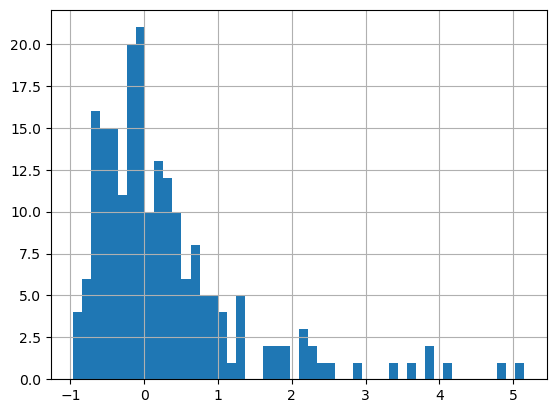

In [61]:
data01_outliers_cleaned[0].hist(bins = 50)

In [63]:
# Overwrite numeric columns with square root-transformed values
data01_outliers_cleaned[data01_outliers_cleaned.select_dtypes(include=[np.number]).columns] = data01_outliers_cleaned.select_dtypes(include=[np.number]).apply(np.sqrt)

(array([2., 1., 2., 3., 2., 1., 1., 2., 7., 4., 2., 4., 5., 6., 2., 6., 3.,
        7., 3., 3., 5., 3., 3., 2., 0., 5., 0., 0., 2., 2., 2., 0., 4., 1.,
        1., 1., 0., 1., 0., 0., 1., 1., 0., 2., 1., 0., 0., 0., 1., 1.]),
 array([0.        , 0.04538127, 0.09076254, 0.1361438 , 0.18152507,
        0.22690634, 0.27228761, 0.31766887, 0.36305014, 0.40843141,
        0.45381268, 0.49919394, 0.54457521, 0.58995648, 0.63533775,
        0.68071902, 0.72610028, 0.77148155, 0.81686282, 0.86224409,
        0.90762535, 0.95300662, 0.99838789, 1.04376916, 1.08915043,
        1.13453169, 1.17991296, 1.22529423, 1.2706755 , 1.31605676,
        1.36143803, 1.4068193 , 1.45220057, 1.49758183, 1.5429631 ,
        1.58834437, 1.63372564, 1.67910691, 1.72448817, 1.76986944,
        1.81525071, 1.86063198, 1.90601324, 1.95139451, 1.99677578,
        2.04215705, 2.08753831, 2.13291958, 2.17830085, 2.22368212,
        2.26906339]),
 <BarContainer object of 50 artists>)

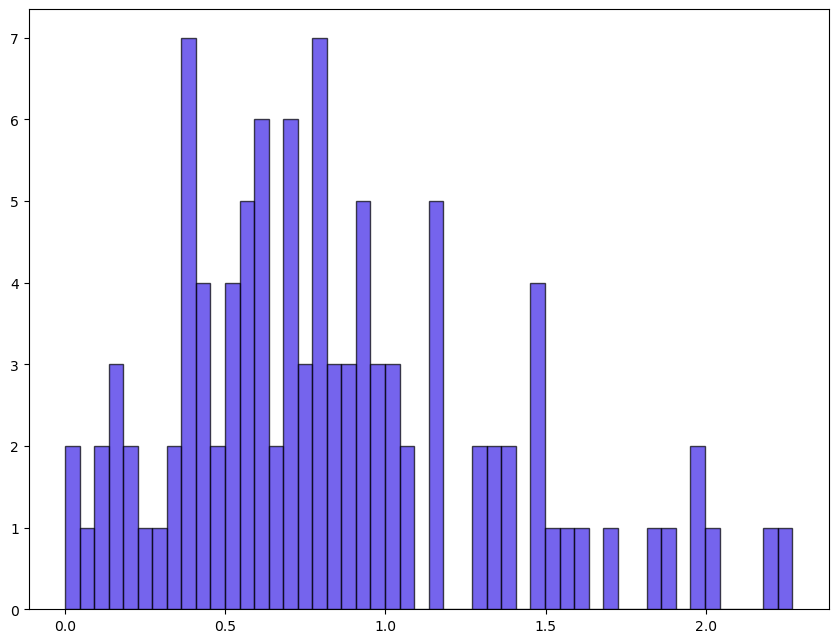

In [75]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.hist(data01_outliers_cleaned[0], bins = 50,
       color = '#3A22E6',
       edgecolor = 'black',
       alpha = 0.7)

In [100]:
data01_outliers_cleaned.isnull().sum()

0     103
1     103
2     104
3     104
4     104
     ... 
56    104
57    103
58    104
59     98
60    208
Length: 61, dtype: int64

In [96]:
data01_outliers_cleaned.shape

(208, 61)

In [98]:
# split dataset 

X = data01_outliers_cleaned.drop(columns = [60])
y = data01_outliers_cleaned[60]

In [82]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,NaN,0.447214,0.466850,NaN,0.727136,0.310041,0.801418,0.733667,1.078482,0.426977,...,0.866025,NaN,NaN,0.850463,NaN,1.262989,1.338589,0.620633,0.625282,NaN
1,1.006734,0.826160,1.132277,0.786965,0.946967,1.573580,1.219147,1.626801,1.153377,0.815913,...,NaN,NaN,NaN,NaN,0.488870,1.408476,1.094087,NaN,NaN,NaN
2,0.391348,0.932653,1.392286,1.265404,0.748911,1.422881,1.364741,1.723858,1.728555,1.666111,...,NaN,1.117442,0.847088,0.148047,1.149241,1.685854,1.952979,1.253144,0.682763,0.678844
3,NaN,NaN,0.847319,NaN,NaN,NaN,0.197453,0.416912,NaN,NaN,...,0.906962,0.272166,NaN,0.790353,0.354663,0.269953,NaN,NaN,NaN,1.086151
4,1.550937,1.066071,0.594850,NaN,NaN,NaN,0.436846,1.228573,1.223397,1.293759,...,0.370266,NaN,NaN,0.362639,0.663515,NaN,0.431131,NaN,0.804125,0.869345


In [86]:
y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 60, dtype: float64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

X.shape, X_train.shape, X_test.shape, y_train.shape

((208, 60), (166, 60), (42, 60), (166,))

In [77]:
y_train.value_counts()

60
0    85
1    81
Name: count, dtype: int64

In [135]:
## Build a Neural network 

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

tf.random.set_seed(42)

# 1. Creat a model

model_01 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation = 'relu', input_shape= (X_train.shape[1],), kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])


# 2, Compilation the build model

model_01.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001),
    metrics=['accuracy']
)

# Collbacks 

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 30, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 30, verbose= 1)


# 3. Fit the model

history_01 = model_01.fit(
    X_train,  y_train,
    epochs = 100,
    batch_size = 32,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping, reduce_lr]
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6116 - loss: 2.8744 - val_accuracy: 0.6429 - val_loss: 2.7230 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5632 - loss: 2.8401 - val_accuracy: 0.7857 - val_loss: 2.6666 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6018 - loss: 2.7553 - val_accuracy: 0.8333 - val_loss: 2.6168 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7536 - loss: 2.5702 - val_accuracy: 0.8095 - val_loss: 2.5707 - learning_rate: 0.0010
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 2.4314 - val_accuracy: 0.8095 - val_loss: 2.5300 - learning_rate: 0.0010
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7427 - loss: 2.5727 - val_accuracy: 0.8095 - val_loss: 2.4909 - learning_rate: 0.0010
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 2.4260 - val_accuracy: 0.8571 - val_loss:

In [137]:
model_01.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,325 (220.02 KB)

 Trainable params: 18,625 (72.75 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 37,252 (145.52 KB)

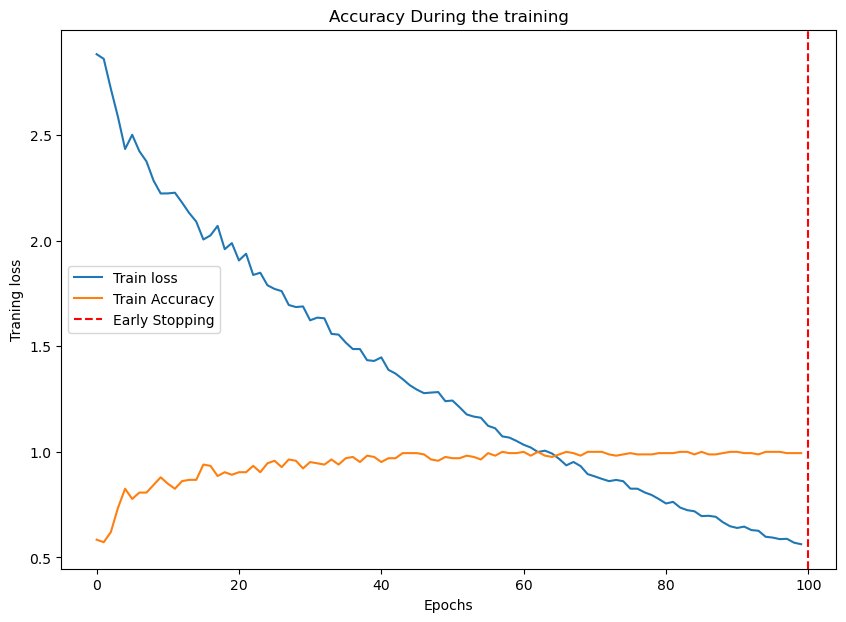

In [159]:
# Plot the model accuracy and other some stuff

plt.figure(figsize = (10, 7))

plt.plot(history_01.history['loss'], label = 'Train loss')
plt.plot(history_01.history['accuracy'], label = 'Train Accuracy')
plt.axvline(len(history_01.history['accuracy']), color = 'red', linestyle = '--', label = 'Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Traning loss')
plt.legend()
plt.title('Accuracy During the training')
plt.show()

In [153]:
# Make Some prediction 

y_preds = model_01.predict(X_test)

# Covert the probabilities to class label (0 or 1)

y_class_preds = (y_preds >= 0.5).astype(int)

print(y_class_preds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]


In [155]:
# Probabilities values 

print(y_preds)

[[1.0629260e-03]
 [6.1101443e-01]
 [6.6157764e-01]
 [9.8890114e-01]
 [2.9763477e-03]
 [8.2076192e-01]
 [9.9033558e-01]
 [3.3973038e-02]
 [9.9469846e-01]
 [2.3936376e-02]
 [3.4742625e-03]
 [7.7613258e-01]
 [1.7011003e-01]
 [5.2448222e-04]
 [6.8708527e-01]
 [1.3009734e-03]
 [1.5708346e-02]
 [3.5776002e-03]
 [4.5298755e-01]
 [9.8392659e-01]
 [1.2301926e-02]
 [6.2474888e-03]
 [1.4092927e-01]
 [1.0064080e-02]
 [9.9980885e-01]
 [7.5038081e-01]
 [9.9904341e-01]
 [2.6046364e-02]
 [2.1821749e-03]
 [7.3092832e-04]
 [1.3499860e-01]
 [2.0694803e-01]
 [9.9757868e-01]
 [4.1962415e-02]
 [5.7109487e-03]
 [3.1600387e-03]
 [1.3038749e-03]
 [4.0008742e-02]
 [8.7023276e-01]
 [6.8072051e-02]
 [9.9296230e-01]
 [8.1490016e-01]]


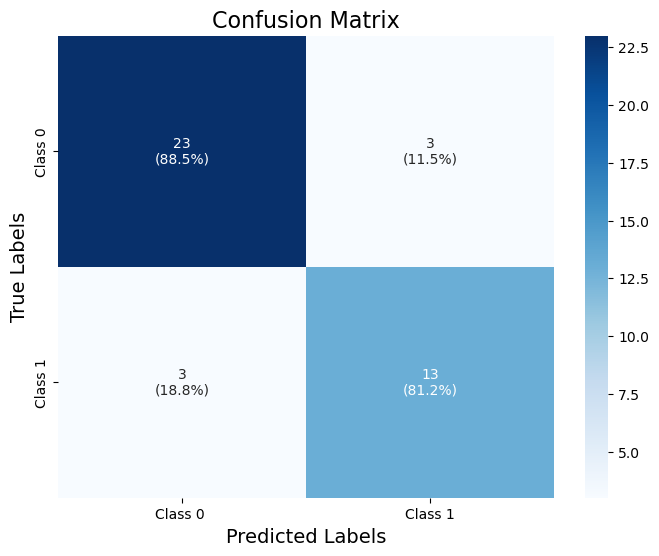

In [177]:
from sklearn.metrics import confusion_matrix

# Convert the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))

# Calculate the percentage
cm_percent = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis] * 100

# Combination integer value and percentages
labels = np.array([[f'{int(val)}\n({val_percent:.1f}%)'
                   for val, val_percent in zip(row, percent_row)]
                   for row, percent_row in zip(cm, cm_percent)])

# Create a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar='False', xticklabels=['Class 0 ', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Labels", fontsize = 14)
plt.ylabel("True Labels", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 16)
plt.show()

In [236]:
data01_outliers_cleaned.to_csv('cleaned_data.csv', index=False)

In [228]:
# Save the model for future use
joblib.dump(model_01, 'your_trained_model.pkl')


['your_trained_model.pkl']

In [107]:
numbers = [
    10.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111,
    0.1609, 0.1582, 0.2238, 0.0645, 0.0660, 0.2273, 0.3100, 0.2999, 0.5078, 0.4797,
    0.5783, 0.5071, 0.4328, 0.5550, 0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857,
    0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
    0.0510, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324,
    0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.0180, 0.0084, 0.0090, 0.0032
]

In [111]:
import numpy as np
import joblib  # For loading scikit-learn models

# Load the saved model
model = joblib.load('your_trained_model.pkl')  # Use the appropriate method for loading your model

# Input data (already provided as numbers list)
input_data = numbers

# Convert input_data to a numpy array and reshape it
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Predict
Prediction = model.predict(input_data_reshape)

# Output the prediction value
print('Prediction symbol: ', Prediction)

# If prediction is a continuous value (e.g., probability), interpret it with a threshold (e.g., 0.5)
if Prediction[0] > 0.5:
    print('The object is detected as a [Rock]!')
else:
    print('The object is detected as a [Mine]!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction symbol:  [[0.0046109]]
The object is detected as a [Mine]!


# Create a model_02

In [104]:
data01.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


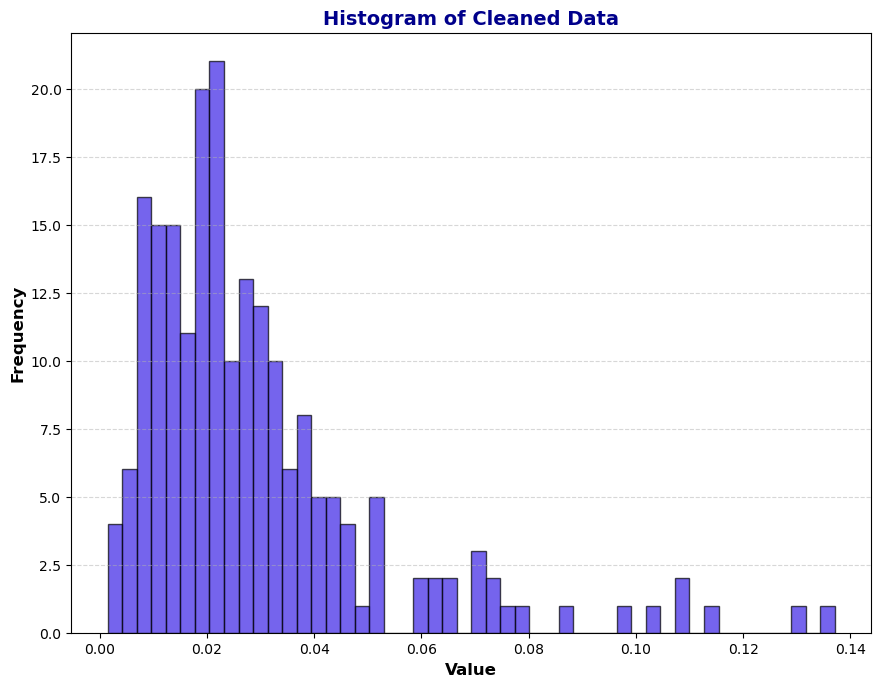

In [108]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.hist(data01[0], bins=50, 
        color='#3A22E6', edgecolor='black', alpha=0.7)  # Attractive color + edge + transparency

# 🎯 Improve Readability
ax.set_title("Histogram of Cleaned Data", fontsize=14, fontweight='bold', color='darkblue')
ax.set_xlabel("Value", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')

# 📏 Add Grid for Better Visual
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [114]:
# Overwrite numerical column with square root transformed values

data01[data01.select_dtypes(include = [np.number]).columns] = data01.select_dtypes(include = [np.number]).apply(np.sqrt)

In [116]:
data01.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.141421,0.192614,0.206882,0.143875,0.308869,0.314006,0.392301,0.400125,0.557584,0.459456,...,0.051962,0.080623,0.126095,0.084853,0.129228,0.134164,0.091652,0.094868,0.056569,R
1,0.212838,0.228692,0.290345,0.262488,0.343948,0.508232,0.464327,0.590000,0.577668,0.535910,...,0.091652,0.094340,0.069282,0.096954,0.138203,0.118322,0.070000,0.072111,0.066332,R
2,0.161864,0.241247,0.331512,0.329090,0.312090,0.477493,0.493052,0.614085,0.748198,0.787020,...,0.152315,0.128841,0.097468,0.134164,0.156205,0.177764,0.128062,0.097468,0.088318,R
3,0.100000,0.130767,0.249600,0.143178,0.143178,0.191833,0.331361,0.357211,0.244540,0.355528,...,0.110000,0.060000,0.122474,0.092195,0.085440,0.070711,0.066332,0.063246,0.108167,R
4,0.276043,0.258070,0.219317,0.198494,0.242899,0.254755,0.347707,0.496689,0.596992,0.667757,...,0.055678,0.073485,0.102470,0.104881,0.038730,0.084853,0.069282,0.103441,0.096954,R


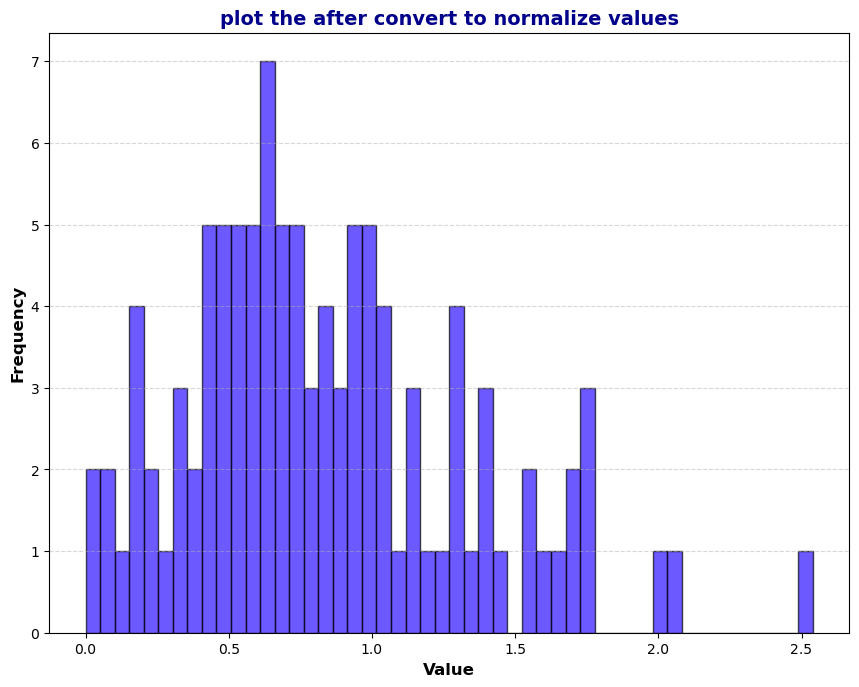

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.hist(data01_outliers_cleaned[1], bins=50, 
        color='#2E12FF', edgecolor='black', alpha=0.7)  # Attractive color + edge + transparency

# 🎯 Improve Readability
ax.set_title("plot the after convert to normalize values", fontsize=14, fontweight='bold', color='darkblue')
ax.set_xlabel("Value", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')

# 📏 Add Grid for Better Visual
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [124]:
# Label encoding

dataMapping = {
    'R': 1,
    'M': 0

}

data01[60] = data01[60].map(dataMapping)

data01.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.141421,0.192614,0.206882,0.143875,0.308869,0.314006,0.392301,0.400125,0.557584,0.459456,...,0.051962,0.080623,0.126095,0.084853,0.129228,0.134164,0.091652,0.094868,0.056569,1
1,0.212838,0.228692,0.290345,0.262488,0.343948,0.508232,0.464327,0.590000,0.577668,0.535910,...,0.091652,0.094340,0.069282,0.096954,0.138203,0.118322,0.070000,0.072111,0.066332,1
2,0.161864,0.241247,0.331512,0.329090,0.312090,0.477493,0.493052,0.614085,0.748198,0.787020,...,0.152315,0.128841,0.097468,0.134164,0.156205,0.177764,0.128062,0.097468,0.088318,1
3,0.100000,0.130767,0.249600,0.143178,0.143178,0.191833,0.331361,0.357211,0.244540,0.355528,...,0.110000,0.060000,0.122474,0.092195,0.085440,0.070711,0.066332,0.063246,0.108167,1
4,0.276043,0.258070,0.219317,0.198494,0.242899,0.254755,0.347707,0.496689,0.596992,0.667757,...,0.055678,0.073485,0.102470,0.104881,0.038730,0.084853,0.069282,0.103441,0.096954,1


In [128]:
data01[60].value_counts()

60
0    111
1     97
Name: count, dtype: int64

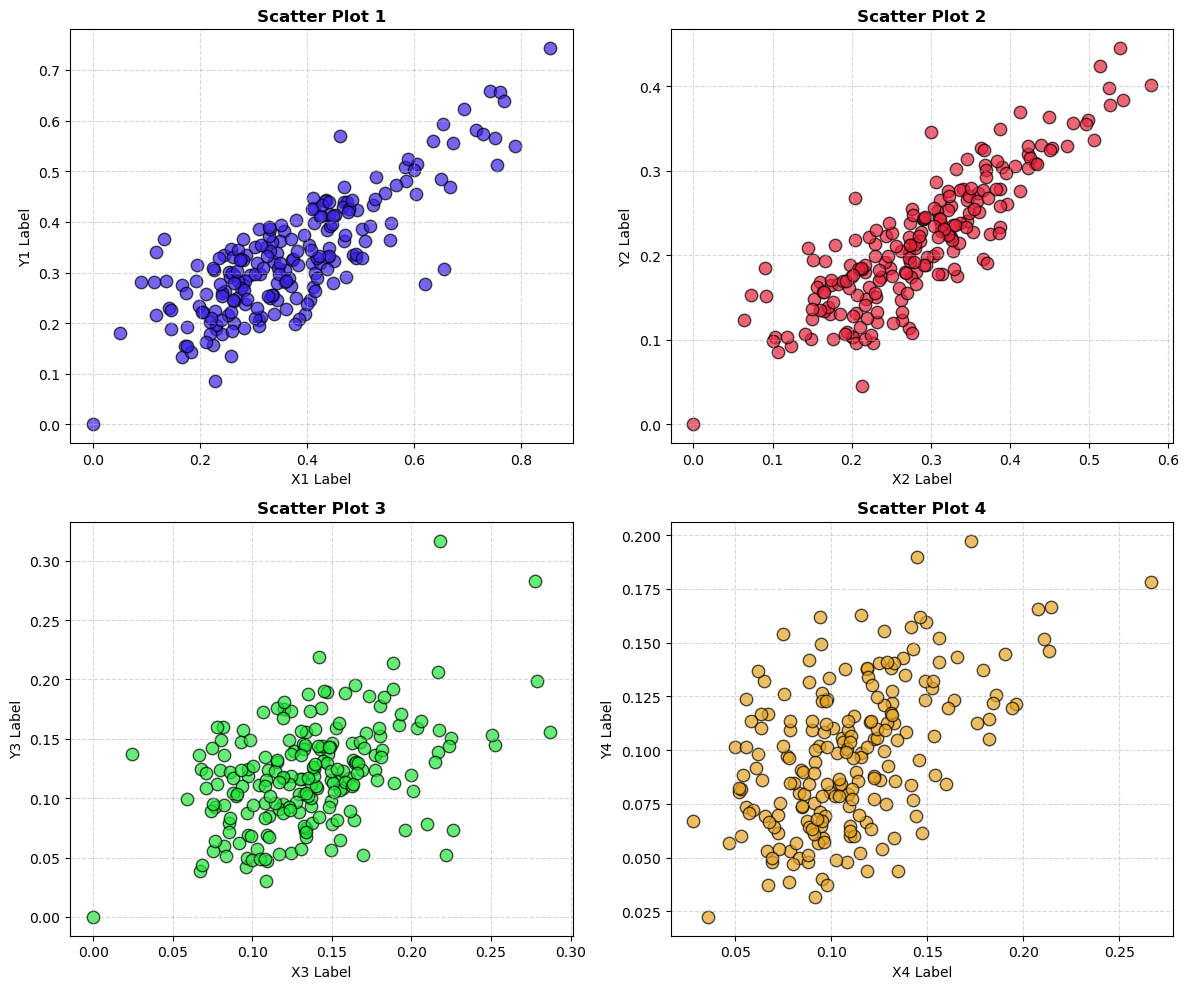

In [146]:
import matplotlib.pyplot as plt

# Sample Data (Replace with Your Own)
x1, y1 = data01[45], data01[46]
x2, y2 = data01[47], data01[48]
x3, y3 = data01[49], data01[50]
x4, y4 = data01[51], data01[52]

# Create Figure and Axes (2x2 Layout)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  

# Scatter Plot 1
axes[0, 0].scatter(x1, y1, color='#3A22E6', edgecolor='black', alpha=0.7, s=80, marker='o')
axes[0, 0].set_title("Scatter Plot 1", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("X1 Label")
axes[0, 0].set_ylabel("Y1 Label")
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Scatter Plot 2
axes[0, 1].scatter(x2, y2, color='#E6223A', edgecolor='black', alpha=0.7, s=80, marker='o')
axes[0, 1].set_title("Scatter Plot 2", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("X2 Label")
axes[0, 1].set_ylabel("Y2 Label")
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Scatter Plot 3
axes[1, 0].scatter(x3, y3, color='#22E63A', edgecolor='black', alpha=0.7, s=80, marker='o')
axes[1, 0].set_title("Scatter Plot 3", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("X3 Label")
axes[1, 0].set_ylabel("Y3 Label")
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Scatter Plot 4
axes[1, 1].scatter(x4, y4, color='#E6A322', edgecolor='black', alpha=0.7, s=80, marker='o')
axes[1, 1].set_title("Scatter Plot 4", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("X4 Label")
axes[1, 1].set_ylabel("Y4 Label")
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()